## Create a random search algorythm to solve Frozen Lake

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np


#configurar el entorno del lago congelado
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode="rgb_array")

episodes = 200 #número de episodios
rewards_per_episode = np.zeros(episodes) #recompensas por episodio
rgb_arrays = []

# create empty array to store the sucessful path
correct_path = []

for episode in range(episodes):
    state, info = env.reset()
    terminated = False
    truncated = False

    path = []

    while(not terminated and not truncated):

        if correct_path != []:
            action = correct_path[len(path)]
        else:
            action = env.action_space.sample()

        path.append(action)

        state, reward, terminated, truncated, info = env.step(action)

        rgb_arrays.append(env.render())

    if(reward == 1):
        correct_path = path
        rewards_per_episode[episode] = 1

env.close()

sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

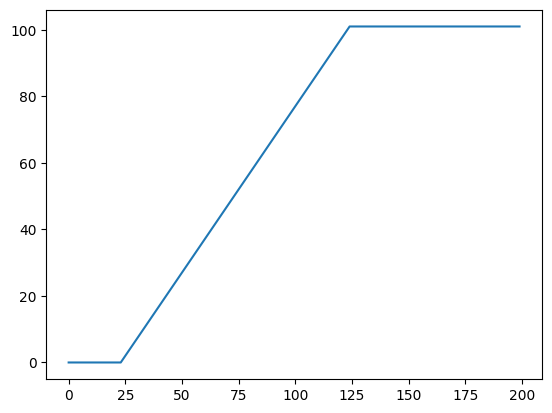

In [2]:
plt.plot(sum_rewards)
plt.savefig('frozen_lake8x8.png')

In [3]:
import sys
import os
from IPython.display import HTML

# Add the parent directory to sys.path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plotting import display_video

video = display_video(rgb_arrays[-50:], interval=50)
#save video
HTML(video.to_jshtml())